#  Análise de Faturamento – O//QUARTO Records
Este notebook demonstra o crescimento do faturamento da gravadora O//QUARTO Records entre janeiro de 2024 e janeiro de 2025, com base em dados históricos e análise com Python.


In [7]:
#  Importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
#  Leitura do arquivo CSV
df = pd.read_csv('Análise_produção BI - DADO BRUTO.csv')

In [9]:
#  Limpeza inicial
df_clean = df.copy()
df_clean = df_clean.loc[:, ~df_clean.columns.str.contains('^Unnamed')]
df_clean['Data início'] = pd.to_datetime(df_clean['Data início'], errors='coerce', dayfirst=True)
df_clean = df_clean.dropna(subset=['Data início'])
df_clean['Valor'] = pd.to_numeric(df_clean['Valor'], errors='coerce')
df_clean = df_clean.dropna(subset=['Valor'])

##  Filtro: Janeiro/2024 a Janeiro/2025

In [10]:
start_date = pd.to_datetime('2024-01-01')
end_date = pd.to_datetime('2025-01-31')
df_periodo = df_clean[(df_clean['Data início'] >= start_date) & (df_clean['Data início'] <= end_date)]
df_periodo['AnoMes'] = df_periodo['Data início'].dt.to_period('M')

/tmp/ipython-input-10-1098940438.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_periodo['AnoMes'] = df_periodo['Data início'].dt.to_period('M')


In [11]:
#  Faturamento mensal
faturamento_mensal = df_periodo.groupby('AnoMes')['Valor'].sum().reset_index()
faturamento_mensal['AnoMes'] = faturamento_mensal['AnoMes'].astype(str)

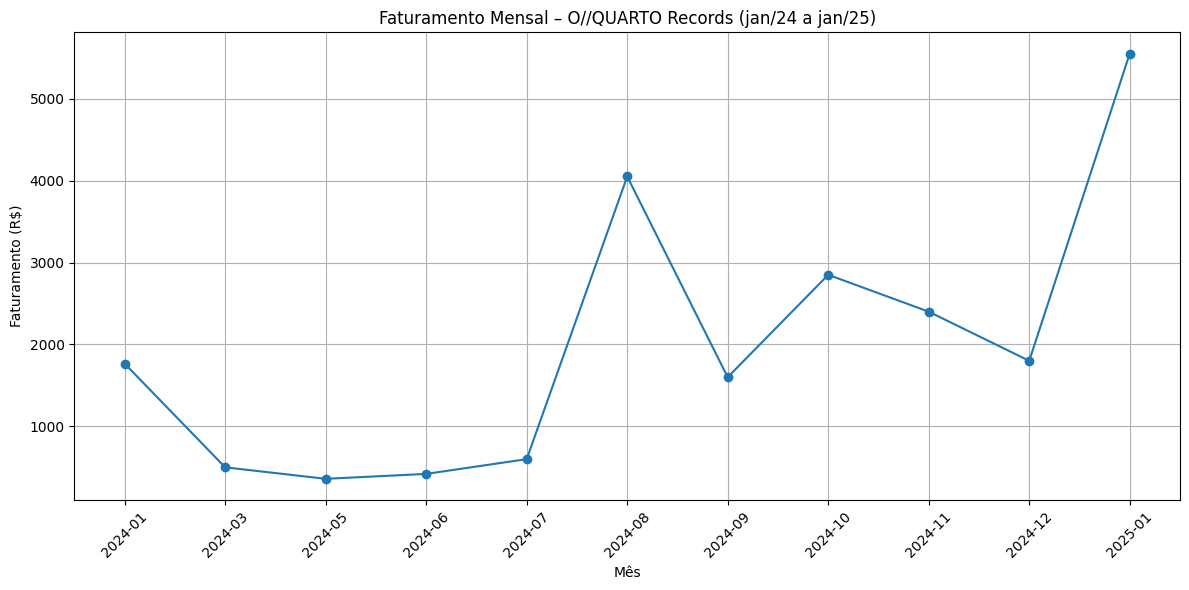

In [12]:
#  Gráfico de evolução do faturamento
plt.figure(figsize=(12, 6))
plt.plot(faturamento_mensal['AnoMes'], faturamento_mensal['Valor'], marker='o')
plt.xticks(rotation=45)
plt.title('Faturamento Mensal – O//QUARTO Records (jan/24 a jan/25)')
plt.xlabel('Mês')
plt.ylabel('Faturamento (R$)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
#  Cálculo do crescimento percentual
faturamento_inicio = faturamento_mensal.iloc[0]['Valor']
faturamento_fim = faturamento_mensal.iloc[-1]['Valor']
crescimento_percentual = ((faturamento_fim - faturamento_inicio) / faturamento_inicio) * 100
print(f'Crescimento percentual de jan/24 a Jan/25: {crescimento_percentual:.2f}%')

Crescimento percentual de jan/24 a Jan/25: 214.27%


Surgimento
Google            5
Indicação        17
Anúncio_insta    20
Name: count, dtype: int64


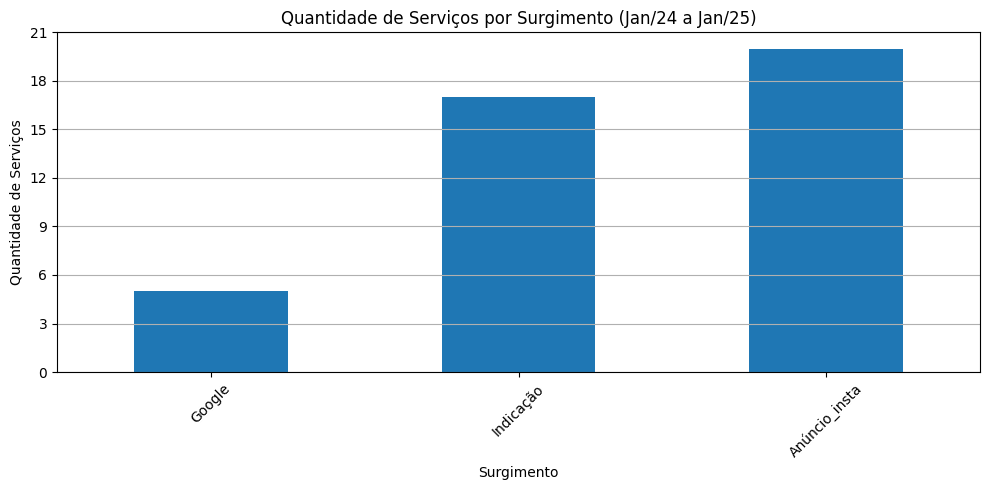

In [14]:
from matplotlib.ticker import MaxNLocator

# Filtrar o período de Jan/2024 até Jan/2025
df_periodo = df_clean[
    (df_clean['Data início'] >= '2024-01-01') &
    (df_clean['Data início'] <= '2025-01-31')
]

# Contar os serviços por tipo de surgimento
surgimento_periodo = df_periodo['Surgimento'].value_counts().sort_values()

# Exibir a tabela
print(surgimento_periodo)

# Gráfico de barras com valores inteiros no eixo Y
plt.figure(figsize=(10, 5))
surgimento_periodo.plot(kind='bar')
plt.title('Quantidade de Serviços por Surgimento (Jan/24 a Jan/25)')
plt.xlabel('Surgimento')
plt.ylabel('Quantidade de Serviços')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))  # 👈 Isso força inteiros no eixo Y
plt.tight_layout()
plt.show()

###  Conclusão
Com base nos dados analisados, a O//QUARTO Records obteve um crescimento aproximado de **+214%** no faturamento entre janeiro de 2024 e janeiro de 2025, comprovando a eficácia das estratégias adotadas com base na análise de dados. O aumento de serviços com surgimento a partir do 'Anúncio_insta' demonstra isso na prática.